In [2]:
# Dependencies
# ----------------------------------
# Imports the method used for connecting to DBs
import sqlalchemy

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float, inspect
import psycopg2
from sqlalchemy.ext.automap import automap_base
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from config import pgadmin_pass

In [4]:
engine = sqlalchemy.create_engine(sqlalchemy.engine.url.URL(
        drivername="postgresql",
        username="mgood13",
        password=pgadmin_pass,
        host="localhost",
        port="5432",
        database="employee_database",
    ),
    echo_pool=True,
)


In [5]:
Base = automap_base()

In [6]:
 # Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
Base.classes.keys()

['departments', 'employees', 'titles']

In [8]:
conn = engine.connect()

In [9]:
inspector = inspect(engine)

In [10]:
inspector.get_table_names()

['dept_manager', 'salaries', 'titles', 'employees', 'dept_emp', 'departments']

In [11]:
dept_manager_df = pd.read_sql_table('dept_manager',conn)
salaries_df = pd.read_sql_table('salaries',conn)
titles_df = pd.read_sql_table('titles',conn)
employees_df = pd.read_sql_table('employees',conn)
dept_emp_df = pd.read_sql_table('dept_emp',conn)
departments_df = pd.read_sql_table('departments',conn)

In [18]:
salaries_df.head(25)
bins = [0, 30000, 40000, 50000,60000,70000,80000,90000,100000,125000,150000]
group_names = ["30k-", "40k", "50k", "60k", "70k","80k","90k","100k","125k",'150k']
salaries_df["salary bin"] = pd.cut(salaries_df["salary"], bins, labels=group_names, include_lowest=True)

In [13]:
salaries_df.head()

,emp_no,salary,salary bin
0,10001,60117,70k
1,10002,65828,70k
2,10003,40006,50k
3,10004,40054,50k
4,10005,78228,80k


In [14]:
salaries_group = salaries_df.groupby('salary bin').count()
salaries_group = salaries_group.reset_index()

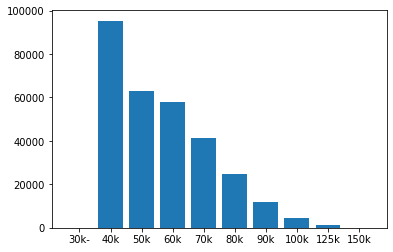

In [15]:
plt.bar(salaries_group['salary bin'],salaries_group['salary'])
plt.show()

In [16]:
salaries_df['salary'].value_counts()

40000    95346
55581       19
53738       18
53078       18
47454       17
         ...  
74239        1
78148        1
76103        1
79114        1
81762        1
Name: salary, Length: 50355, dtype: int64

In [19]:
merged_salary = pd.merge(employees_df,salaries_df, left_on = 'emp_no', right_on = 'emp_no')
merged_salary.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,salary bin
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,40k
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422,60k
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973,50k
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,40k
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000,40k


In [20]:
merged_salary_group = merged_salary.groupby('emp_title_id').mean()
merged_salary_group = merged_salary_group.reset_index()
merged_salary_group

,emp_title_id,salary
0,e0001,48564.434447
1,e0002,48535.336511
2,e0003,48506.799871
3,e0004,48582.896092
4,m0001,51531.041667
5,s0001,58465.382850
6,s0002,58550.172704


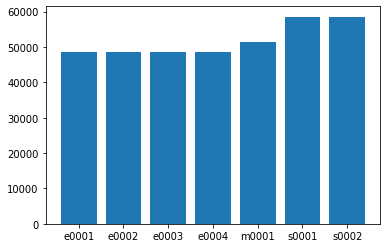

In [21]:
plt.bar(merged_salary_group['emp_title_id'],merged_salary_group['salary'])
plt.show()
# sorry to hear the E4 group has the exact same salary as the lower engineering groups

In [22]:
merged_salary.loc[merged_salary['emp_no'] == '499942',:]
# Amazing

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,salary bin
168736,499942,e0004,1/10/1963,April,Foolsday,F,2/10/1997,40000,40k
